In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, Activation
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils 
from keras.datasets import cifar10

import keras
from matplotlib import pyplot
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

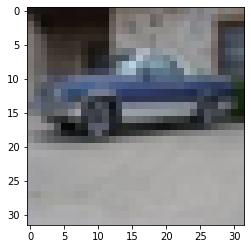

In [9]:
plt.imshow(X_train[10000])

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
X_train /= 255
X_test /= 255

In [12]:
num_classes = 10
num_predictions = 20

In [13]:
X_train.shape[1:]

(32, 32, 3)

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
opt = keras.optimizers.Adam(lr=0.0001, decay=1e-6)

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [18]:
training_set = model.fit(X_train, y_train,
                         batch_size = 20,
                         nb_epoch = 6)

/home/admin1/anaconda3/envs/new_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/6
50000/50000 [==============================] - 99s 2ms/step - loss: 1.7073 - acc: 0.3757
Epoch 2/6
50000/50000 [==============================] - 89s 2ms/step - loss: 1.3787 - acc: 0.5037
Epoch 3/6
50000/50000 [==============================] - 82s 2ms/step - loss: 1.2441 - acc: 0.5565
Epoch 4/6
50000/50000 [==============================] - 82s 2ms/step - loss: 1.1430 - acc: 0.5942
Epoch 5/6
50000/50000 [==============================] - 80s 2ms/step - loss: 1.0675 - acc: 0.6213
Epoch 6/6
50000/50000 [==============================] - 78s 2ms/step - loss: 1.0065 - acc: 0.6457


In [21]:
y_pred = model.predict_classes(X_test)

In [22]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

Since our output i.e y_pred is of the form of classes and y_test is in one hot encoded form converting y_pred to one hot encoding

In [23]:
y_pred = keras.utils.np_utils.to_categorical(y_pred)

In [24]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
score = accuracy_score(y_test, y_pred)
score

0.6814

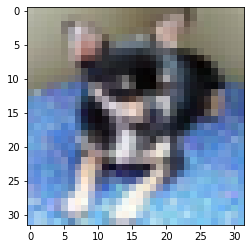

In [75]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3005])
plt.show() 

In [76]:
X_train[3005].shape

(32, 32, 3)

In [77]:
new_data = X_train[3005]

In [78]:
new_data

array([[[0.7254902 , 0.7294118 , 0.67058825],
        [0.69803923, 0.7019608 , 0.63529414],
        [0.69411767, 0.7019608 , 0.627451  ],
        ...,
        [0.6117647 , 0.6039216 , 0.52156866],
        [0.627451  , 0.61960787, 0.5372549 ],
        [0.654902  , 0.64705884, 0.5647059 ]],

       [[0.7019608 , 0.7058824 , 0.64705884],
        [0.68235296, 0.6862745 , 0.62352943],
        [0.6784314 , 0.68235296, 0.60784316],
        ...,
        [0.5882353 , 0.5803922 , 0.49803922],
        [0.6       , 0.5921569 , 0.5137255 ],
        [0.62352943, 0.6156863 , 0.53333336]],

       [[0.6862745 , 0.6901961 , 0.63529414],
        [0.6745098 , 0.6784314 , 0.6156863 ],
        [0.6666667 , 0.67058825, 0.6       ],
        ...,
        [0.58431375, 0.5764706 , 0.49411765],
        [0.59607846, 0.5882353 , 0.5058824 ],
        [0.6156863 , 0.60784316, 0.5254902 ]],

       ...,

       [[0.49019608, 0.6784314 , 0.9254902 ],
        [0.40784314, 0.6156863 , 0.8509804 ],
        [0.49411765, 0

In [79]:
new_data.shape

(32, 32, 3)

In [80]:
import numpy as np

In [81]:
new_data = np.reshape(new_data, (1,32,32,3))

In [82]:
new_data.shape

(1, 32, 32, 3)

In [83]:
result = model.predict(new_data)

In [84]:
result

array([[1.3273816e-02, 6.4997864e-04, 1.1321594e-02, 2.6761454e-01,
        1.4632370e-02, 6.4763916e-01, 4.2111404e-02, 2.5005885e-03,
        1.8247050e-04, 7.4026146e-05]], dtype=float32)

In [85]:
res = model.predict_classes(new_data)

In [86]:
res

array([5])

The Values of corresponding labels are as follows:

0 = Airplane

1 = Automobile

2 = bird

3 = cat

4 = deer

5 = dog

6 = frog

7 = horse

8 = ship

9 = truck
